# Splines
## Basic idea
A very important idea in machine learning consists in transforming features of interest or creating new features from the data. Here we will take a look at so-called splines and spline basis functions. With splines, we can model certain functional relationships arbitrarily well. To do so, we re-represent the features as evaluations of a spline basis. We can treat these new features as additional features of an extended linear model. Using empirical risk minimization, we can then get an estimate for the regression coefficients $\Theta_j$ associated with these spline basis features $b_j(x)$, j = 1, . . . , K, which determine the shape of the spline function, i.e., the functional relationship f (x) between the feature x and the target y:

$$ f(x)=\sum_{j=1}^{K}b_j(x)\theta_j$$

## B-splines
One of the most commonly used spline bases is the so-called B-spline basis, which consists of locally defined polynomials. To use splines we have to fill our domain with knots $t_0,...,t_{m+1}$, which will serve as supporting points for the spline. For example we can use 5 equidistant knots with a piecewise polynomial degree of $l = 1$:

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
boston_housing = pd.read_csv("boston_housing2.csv")

In [6]:
boston_housing.head()

,town,tract,lon,lat,medv,cmedv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,Nahant,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [8]:
boston_housing.medv=boston_housing.medv/10

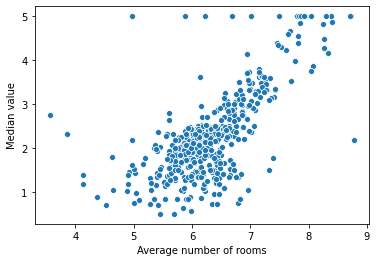

In [12]:
sns.scatterplot(x='rm',y='medv',data=boston_housing)
plt.xlabel('Average number of rooms')
plt.ylabel('Median value');

Now let’s say we want to use 5 piecewise polynomials of degree 2:

In [15]:
poly_deg = 2
num_bfuns = 5
num_data = 1000 # number of points we want to use for plotting
rm_min = min(boston_housing.rm)
rm_max = max(boston_housing.rm)
rooms = np.linspace(rm_min, rm_max, num_data)

In [17]:
rooms.shape

(1000,)